In [1]:
!pip install -r requirements.txt

In [2]:
import random

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
m = 1000000
a_values = [random.random() * 20 for x in range(m)]
b_values = [random.random() * 20 for x in range(m)]

In [41]:
X = pd.DataFrame({ 'a': a_values, 'b': b_values})
X.head()

,a,b
0,16.683476,14.686510
1,2.774300,17.024068
2,12.486758,8.670186
3,0.318678,2.846580
4,1.730743,10.930389


In [42]:
X.shape

(1000000, 2)

In [43]:
def logical_or(row):
    return row['a'] or row['b']

def polynomial_two_variable(row):
    return row['a'] ** 2 + row['a'] * row['b'] + row['b'] - 5

In [44]:
# y_values = X.apply(logical_or, axis=1)
y_values = X.apply(polynomial_two_variable, axis=1)
y = pd.DataFrame({ 'y': y_values })
y.head()

,y
0,533.046933
1,66.950673
2,267.851837
3,-1.144723
4,27.843559


In [45]:
size_val_set = min(int(m * 0.2), 20000)
size_test_set = min(int(m * 0.2), 20000)
end_test_set = size_val_set + size_test_set

X_val = X[0:size_val_set]
y_val = y[0:size_val_set]
X_test = X[size_val_set:end_test_set]
y_test = y[size_val_set:end_test_set]
X_train = X[end_test_set:]
y_train = y[end_test_set:]

print(f"X_train has {X_train.shape[0]} values, X_val {X_val.shape[0]}, and X_test {X_test.shape[0]}.")
print(f"y_train has {y_train.shape[0]} values, y_val {y_val.shape[0]}, and y_test {y_test.shape[0]}.")

sum_rows = X_train.shape[0] + X_val.shape[0] + X_test.shape[0]
print(f"We have {X.shape[0]} rows in X. We have {sum_rows} in all sub-matrices combined (which should be the same).")
assert(sum_rows == X.shape[0])

X_train has 960000 values, X_val 20000, and X_test 20000.
y_train has 960000 values, y_val 20000, and y_test 20000.
We have 1000000 rows in X. We have 1000000 in all sub-matrices combined (which should be the same).


In [46]:
from tensorflow.keras.layers import Dense

model = tf.keras.models.Sequential()

model.add(Dense(units=4, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [47]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])

In [48]:
history = model.fit(X_train, y_train, batch_size=512, epochs=100, validation_data=(X_val, y_val))

Train on 960000 samples, validate on 20000 samples
Epoch 1/100
960000/960000 [==============================] - 2s 2us/sample - loss: 11141.0743 - accuracy: 0.0000e+00 - recall: 0.9863 - val_loss: 267.7032 - val_accuracy: 0.0000e+00 - val_recall: 1.0000
Epoch 2/100
960000/960000 [==============================] - 2s 2us/sample - loss: 60.6523 - accuracy: 0.0000e+00 - recall: 1.0000 - val_loss: 24.8364 - val_accuracy: 0.0000e+00 - val_recall: 1.0000
Epoch 3/100
960000/960000 [==============================] - 2s 2us/sample - loss: 20.5593 - accuracy: 0.0000e+00 - recall: 1.0000 - val_loss: 20.1034 - val_accuracy: 0.0000e+00 - val_recall: 1.0000
Epoch 4/100
960000/960000 [==============================] - 2s 2us/sample - loss: 16.5117 - accuracy: 0.0000e+00 - recall: 1.0000 - val_loss: 15.1208 - val_accuracy: 0.0000e+00 - val_recall: 1.0000
Epoch 5/100
960000/960000 [==============================] - 2s 2us/sample - loss: 14.3026 - accuracy: 0.0000e+00 - recall: 1.0000 - val_loss: 12.975

960000/960000 [==============================] - 2s 2us/sample - loss: 3.1148 - accuracy: 0.0000e+00 - recall: 0.9836 - val_loss: 2.9411 - val_accuracy: 0.0000e+00 - val_recall: 0.9825
Epoch 42/100
960000/960000 [==============================] - 2s 2us/sample - loss: 3.1205 - accuracy: 0.0000e+00 - recall: 0.9836 - val_loss: 2.9278 - val_accuracy: 0.0000e+00 - val_recall: 0.9823
Epoch 43/100
960000/960000 [==============================] - 2s 2us/sample - loss: 3.0771 - accuracy: 0.0000e+00 - recall: 0.9837 - val_loss: 3.1790 - val_accuracy: 0.0000e+00 - val_recall: 0.9825
Epoch 44/100
960000/960000 [==============================] - 2s 2us/sample - loss: 3.0581 - accuracy: 0.0000e+00 - recall: 0.9838 - val_loss: 2.9917 - val_accuracy: 0.0000e+00 - val_recall: 0.9827
Epoch 45/100
960000/960000 [==============================] - 2s 2us/sample - loss: 3.0170 - accuracy: 0.0000e+00 - recall: 0.9839 - val_loss: 2.9373 - val_accuracy: 0.0000e+00 - val_recall: 0.9828
Epoch 46/100
960000/960

960000/960000 [==============================] - 2s 2us/sample - loss: 2.6088 - accuracy: 0.0000e+00 - recall: 0.9870 - val_loss: 2.5938 - val_accuracy: 0.0000e+00 - val_recall: 0.9864
Epoch 83/100
960000/960000 [==============================] - 2s 2us/sample - loss: 2.6324 - accuracy: 0.0000e+00 - recall: 0.9871 - val_loss: 2.5303 - val_accuracy: 0.0000e+00 - val_recall: 0.9865
Epoch 84/100
960000/960000 [==============================] - 2s 2us/sample - loss: 2.6226 - accuracy: 0.0000e+00 - recall: 0.9871 - val_loss: 2.6719 - val_accuracy: 0.0000e+00 - val_recall: 0.9865
Epoch 85/100
960000/960000 [==============================] - 2s 2us/sample - loss: 2.6362 - accuracy: 0.0000e+00 - recall: 0.9872 - val_loss: 2.5475 - val_accuracy: 0.0000e+00 - val_recall: 0.9868
Epoch 86/100
960000/960000 [==============================] - 2s 2us/sample - loss: 2.6189 - accuracy: 0.0000e+00 - recall: 0.9872 - val_loss: 2.6538 - val_accuracy: 0.0000e+00 - val_recall: 0.9869
Epoch 87/100
960000/960

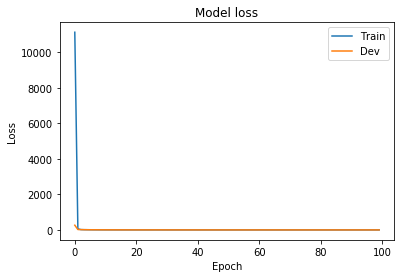

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='best')
plt.show()

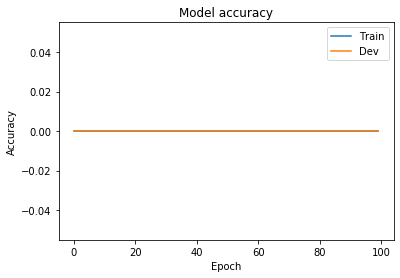

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='best')
plt.show()

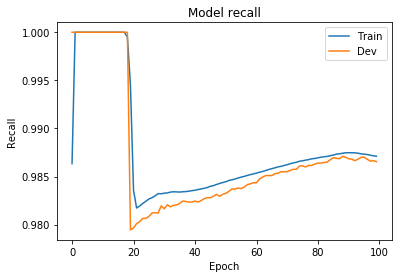

In [51]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='best')
plt.show()

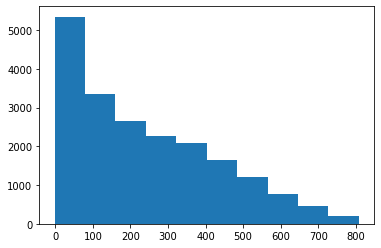

In [52]:
y_pred = model.predict(X_val)
plt.hist(y_pred)
plt.show()

In [53]:
model.predict([(0, 0), (1, 0), (0, 1), (1, 1)])

array([[-2.1941805],
       [-2.1941805],
       [-2.1941805],
       [-2.1941805]], dtype=float32)

In [54]:
model.predict([(2, 2), (3, 7)])

array([[ 4.2445126],
       [31.163948 ]], dtype=float32)

In [55]:
def test_prediction(a, b):
    values = { 'a': a, 'b': b }
    print(f"(a, b) = ({values['a']}, {values['b']}), solution: {polynomial_two_variable(values)}")
    prediction = model.predict([(values['a'], values['b'])])
    print(f"Prediction: {prediction}")
    print('---')
test_prediction(2, 2)
test_prediction(3, 1)
test_prediction(0, 0)
test_prediction(16, 7)

(a, b) = (2, 2), solution: 5
Prediction: [[4.2445126]]
---
(a, b) = (3, 1), solution: 8
Prediction: [[8.045976]]
---
(a, b) = (0, 0), solution: -5
Prediction: [[-2.194182]]
---
(a, b) = (16, 7), solution: 370
Prediction: [[370.48154]]
---
